### Imports

In [1]:
import random
import numpy as np
import moviepy.editor as mpy
from IPython.display import Image
from numba import jit
from pyrt.renderer import RGBImage, loadimage
from pyrt.math import Vec2, Vec3
from pyrt.math import clamp3, cross3, step
from pyrt.math import SimplexNoise, TileableNoise
from pyrt.math import mod
from pyrt.geometry import Triangle, Vertex
from pyrt.camera import PerspectiveCamera

### Create virtual framebuffer

In [2]:
w = 256
h = 256
image = RGBImage(w, h)

### Draw a point


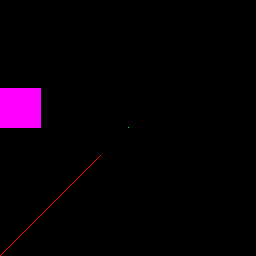

Time to display: 0.03s


In [3]:
position = Vec2(128, 128)

color = Vec3(0, 1, 0)

image.drawPoint(position, color, 1)

# Display the buffer
image.framebuffer()

### Draw a line

In [4]:
posStart = Vec2(0, 0)
posEnd = Vec2(100, 100)

color = Vec3(1, 0, 0)

image.drawLine(posStart, posEnd, color)

# Update the buffer above
image.update()

Time to display: 0.0s [FPS: 250.0]     

### Draw a rectangle

In [5]:
pos = Vec2(0, int(h*0.5))
width = 40
height = 40

colorRec = Vec3(1, 0, 1)

image.drawRectangle(pos, width, height, colorRec)

image.update()

Time to display: 0.0s [FPS: 249.8]     

### Animated cicrle

In [6]:
def makeFrame(frame):
    imageAnim = RGBImage(w, h)
    
    pos = Vec2(127, 0)
    rad = int(frame*8)
    
    colorBorder = Vec3(0, 1, 1)
    colorFill = Vec3(1, 1, 0)
    
    imageAnim.drawCircleFilled(pos, rad, colorBorder, colorFill, 1)
    return imageAnim.data

animation = mpy.VideoClip(makeFrame, duration=6)

animation.write_gif('animation.gif', fps=24, opt='OptimizePlus', fuzz=10)

Image(url='animation.gif')

MoviePy - Building file animation.gif with imageio.


### Setting up a scene and drawing a triangle

**warning, display() is deprecated and will be removed**: Use the object directly in Jupyter
           also check out the new methods framebuffer() and update() for animations in Jupyter



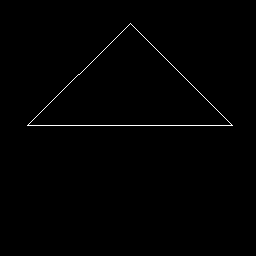

In [7]:
t = Triangle(Vertex(position=(-5, 1, 0)),
             Vertex(position=(0, 1, 5)),
             Vertex(position=(5, 1, 0)))

camera = PerspectiveCamera(w, h, 60)
camera.setView(Vec3(0, -10, 0), Vec3(0, 0, 0), Vec3(0, 0, 1))
vp =  camera.projection * camera.view

at = vp * t.a.position
bt = vp * t.b.position
ct = vp * t.c.position

a_screenpos = Vec2(int(w * 0.5*(at.x + 1.) / at.z), int(h * 0.5*(at.y + 1.) / at.z))
b_screenpos = Vec2(int(w * 0.5*(bt.x + 1.) / bt.z), int(h * 0.5*(bt.y + 1.) / at.z))
c_screenpos = Vec2(int(w * 0.5*(ct.x + 1.) / ct.z), int(h * 0.5*(ct.y + 1.) / at.z))

imageScene = RGBImage(w, h)
color = Vec3(1,1,1)
imageScene.drawLine(a_screenpos, c_screenpos, color)
imageScene.drawLine(c_screenpos, b_screenpos, color)
imageScene.drawLine(b_screenpos, a_screenpos, color)

imageScene.display()